In [9]:
import numpy as np
import matplotlib.pyplot as plt
import json
import minimg as mg
%matplotlib inline

In [2]:
def XYZ_to_RGB(XYZ):
    XYZ_to_RGB = np.array([[0.41847, -0.15866, -0.082835],
                            [-0.091169, 0.25243, 0.015708],
                            [0.000920, -0.002549, 0.17860]])
    return np.dot(XYZ_to_RGB, XYZ)

def C_sRGB(C_lin):
    if C_lin <= 0.0031308:
        return 12.92 * C_lin
    else: return 1.055 * C_lin ** (1 / 2.4) - 0.055

def RGB_to_sRGB(RGB):
    return np.array([C_sRGB(RGB[0]), C_sRGB(RGB[1]), C_sRGB(RGB[2])])

def XYZ_to_LMS(XYZ):
    XYZ_to_LMS = np.array([[0.38971, 0.68898, -0.07868],
                          [-0.22981, 1.18340, 0.04641],
                          [0.0, 0.0, 1.0]])
    return np.dot(XYZ_to_LMS, XYZ)

In [22]:
# patch_spectras = ['Black.reflect', 'Blue.reflect', 'Blue Flower.reflect',
#                   'Blue Sky.reflect', 'Bluish Green.reflect', 'Cyan.reflect',
#                   'Dark Skin.reflect', 'Foilage.reflect', 'Green.reflect', 
#                  'Light Skin.reflect', 'Magenta.reflect', 'Moderate Red.reflect',
#                  'Neutral-3.5.reflect', 'Neutral-5.reflect', 'Neutral-6.5.reflect',
#                  'Neutral-8.reflect', 'Orange.reflect', 'Orange Yellow.reflect',
#                  'Purple.reflect', 'Purplish Blue.reflect', 'Red.reflect',
#                  'White.reflect', 'Yellow.reflect', 'Yellow Green.reflect']

patch_spectras = ['Dark Skin.reflect', 'Light Skin.reflect', 'Blue Sky.reflect',
                 'Foilage.reflect', 'Blue Flower.reflect', 'Bluish Green.reflect',
                 'Orange.reflect', 'Purplish Blue.reflect', 'Moderate Red.reflect',
                 'Purple.reflect', 'Yellow Green.reflect', 'Orange Yellow.reflect',
                 'Blue.reflect', 'Green.reflect', 'Red.reflect',
                 'Yellow.reflect', 'Magenta.reflect', 'Cyan.reflect',
                 'White.reflect', 'Neutral-8.reflect', 'Neutral-6.5.reflect',
                 'Neutral-5.reflect', 'Neutral-3.5.reflect', 'Black.reflect']

In [23]:
x = np.linspace(380, 780, 101)

In [24]:
src = np.loadtxt("./d65.illum")
x_src = np.linspace(300, 830, 531)
src = np.interp(x, x_src, src)

In [25]:
f = open('camera.kinect1.json', 'r')
xyz_dict = json.load(f)
XYZ_R = np.array(xyz_dict['sensitivities']['red'])[:, 1]
XYZ_G = np.array(xyz_dict['sensitivities']['green'])[:, 1]
XYZ_B = np.array(xyz_dict['sensitivities']['blue'])[:, 1]
x_XYZ = np.linspace(365, 830, 94) 
sens_XYZ_R = np.interp(x, x_XYZ, XYZ_R)
sens_XYZ_G = np.interp(x, x_XYZ, XYZ_G)
sens_XYZ_B = np.interp(x, x_XYZ, XYZ_B)

In [26]:
D65 = np.diag(src)

In [60]:
colors = []
for patch in patch_spectras:
    refl = np.loadtxt("./patches/" + patch)
    X = np.dot(np.dot(sens_XYZ_R.T, D65), refl)
    Y = np.dot(np.dot(sens_XYZ_G.T, D65), refl)
    Z = np.dot(np.dot(sens_XYZ_B.T, D65), refl)
    c = np.array([X, Y, Z])
    c = (XYZ_to_RGB(c))
    c = np.clip(c, 0, None)
    c = RGB_to_sRGB(c)
    colors.append(c)
colors = np.array(colors)
colors.shape

(24, 3)

[ 0 ] Dark Skin.reflect
[6.16036809 5.20051127 4.65429717]
[ 1 ] Light Skin.reflect
[9.74169303 8.65493505 7.83803609]
[ 2 ] Blue Sky.reflect
[4.95298109 7.29644384 8.84138859]
[ 3 ] Foilage.reflect
[5.23250678 5.92081705 4.52809818]
[ 4 ] Blue Flower.reflect
[6.41146679 7.86273161 9.80126181]
[ 5 ] Bluish Green.reflect
[ 6.46481588 10.24448442  9.75662504]
[ 6 ] Orange.reflect
[10.89015456  7.51156065  4.67803201]
[ 7 ] Purplish Blue.reflect
[3.27798784 6.27612371 9.20899838]
[ 8 ] Moderate Red.reflect
[9.47343049 6.29758495 6.30126157]
[ 9 ] Purple.reflect
[4.659711   4.60193424 6.4259385 ]
[ 10 ] Yellow Green.reflect
[9.24464575 9.82152837 5.59311545]
[ 11 ] Orange Yellow.reflect
[11.66966309  9.00366153  4.98209863]
[ 12 ] Blue.reflect
[0.         4.91043198 8.20070806]
[ 13 ] Green.reflect
[5.73415882 7.9421021  5.37769414]
[ 14 ] Red.reflect
[8.53147006 4.8264853  4.41980161]
[ 15 ] Yellow.reflect
[12.36957147 10.75767733  5.25862294]
[ 16 ] Magenta.reflect
[8.80215088 6.53990826

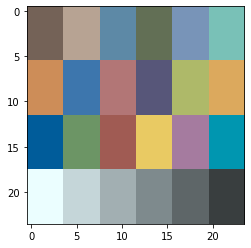

In [61]:
palette = np.zeros((24, 24, 3))
for i in range(24):
    print("[", i, "]", patch_spectras[i])
    print(colors[i])
    palette[(i // 6 * 6):((i // 6 + 1) * 6), (i % 6 * 4):((i % 6 +1)*4)] = colors[i]

plt.imshow(palette / np.amax(palette))
    

In [68]:
cam_R, cam_G, cam_B = np.loadtxt("cam_R.spect"), np.loadtxt("cam_G.spect"), np.loadtxt("cam_B.spect")
x_RGB = np.linspace(380, 784, 101)
sens_RGB_R = np.interp(x, x_RGB, cam_R)
sens_RGB_G = np.interp(x, x_RGB, cam_G)
sens_RGB_B = np.interp(x, x_RGB, cam_B)


In [69]:
colors = []
for patch in patch_spectras:
    refl = np.loadtxt("./patches/" + patch)
    X = np.dot(np.dot(sens_RGB_R.T, D65), refl)
    Y = np.dot(np.dot(sens_RGB_G.T, D65), refl)
    Z = np.dot(np.dot(sens_RGB_B.T, D65), refl)
    c = np.array([X, Y, Z])
    #c = (XYZ_to_RGB(c))
    #c = np.clip(c, 0, None)
    #c = RGB_to_sRGB(c)
    colors.append(c)
colors = np.array(colors)
colors.shape

(24, 3)

[ 0 ] Dark Skin.reflect
[1261227.31704124 1257359.02663515 2711271.81496884]
[ 1 ] Light Skin.reflect
[3884665.33836925 4355968.37562025 9082659.87699223]
[ 2 ] Blue Sky.reflect
[ 1351638.51692041  3077484.71263596 12083366.35498545]
[ 3 ] Foilage.reflect
[ 981791.85238944 2071829.0774442  2441422.30756324]
[ 4 ] Blue Flower.reflect
[ 2055642.93216929  3525608.30164981 15390692.7347223 ]
[ 5 ] Bluish Green.reflect
[ 2604233.25328441  7556347.3144393  15050989.60908824]
[ 6 ] Orange.reflect
[4411608.18007839 2433358.61799201 2780610.7623625 ]
[ 7 ] Purplish Blue.reflect
[  880771.50492855  1950993.73146264 13065374.97645091]
[ 8 ] Moderate Red.reflect
[3144794.10331175 1623633.96241451 5563835.08151753]
[ 9 ] Purple.reflect
[ 766529.54941074  942738.60739046 5855394.64222898]
[ 10 ] Yellow Green.reflect
[3559091.66825729 6890318.2964846  3933875.79518857]
[ 11 ] Orange Yellow.reflect
[5287349.61797858 4414315.70447035 3180997.91986699]
[ 12 ] Blue.reflect
[ 421284.28398348  940589.65991

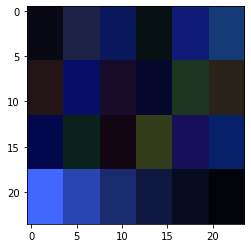

In [70]:
palette = np.zeros((24, 24, 3))
for i in range(24):
    print("[", i, "]", patch_spectras[i])
    print(colors[i])
    palette[(i // 6 * 6):((i // 6 + 1) * 6), (i % 6 * 4):((i % 6 +1)*4)] = colors[i]

plt.imshow(palette / np.amax(palette))
    